# Part I - PISA exploration
## by David Guillaume

## Introduction
> The [PISA](https://www.oecd.org/pisa/) project is led by the OECD (Organization for Economic Co-operation and Development). This international group of the most economically developed country promotes policies that improve economic and social welfare. PISA stands for Program for International Student Assessment and the goal is to retrieve data about the education level (in mathematics, lecture, and natural sciences) of different countries (65) representing 28 million 15-year-old students (Population). Furthermore, it tries to identify the needs in terms of education of the economy. The gathering of data (with a survey of 510 000 students (Sample)) is done every 3 years. The data frame we’ll deal with is from 2012. In our data frame, 44 of 65 countries answered a supplementary part about a creativity problem, and 18 countries about financial literacy. 

## Preliminary Wrangling


### Assessing

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#I have to read the file in encoding latin-1 and not utf-8
df = pd.read_csv('pisa2012.csv', encoding ='latin-1')
df.head(5)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [3]:
df.shape

(485490, 636)

### What is the structure of your dataset?

> Each row represent a student with 636 variables. There is 485490 observation. I think it will be good to clean all the column that we don't need to make it clearer and faster.

### What is/are the main feature(s) of interest in your dataset?

> I answered this question with the help of the files explaining all variables.  
> 1) I'm interested about the effect of digitalization on school performance  
> 2) I live in Switzerland that is a multilanguages countries and I wonder if knowing more language help you at school  
> 3) Does your parent background have an impact on your performances ?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I want to analyse different features on school performance so of course I need features about **performance and student nation**:
> - NC (national centre 6-digit code), STIDSTD (student ID as index), PV1MATH (score in math), PV1READ(score in reading), PV1SCIE (score in science)  
> 1) **Digitalization** interest:  
> - IC01Q01 (posssession of a desktop computer), IC01Q02 (possession of a laptop at home), TIMEINT (time of computer use)  
> 2) **Multilanguage** interest:   
> - TESTLANG (language of the test), LANGN (language at home)  
> 3) **Parent's background** interest:   
> - HISCED (parents highest schooling), DISCLIMA (disciplinary climate)

### Cleaning

In [4]:
# only take columns that we are interesting in
#to not delete too much we'll split the df in 3 for each questions
dig = ["NC","STIDSTD", "PV1MATH", "PV1READ", "PV1SCIE", "IC01Q01", "IC01Q02", "TIMEINT"]
lang = ["NC","STIDSTD", "PV1MATH", "PV1READ", "PV1SCIE", "TESTLANG", "LANGN"]
pBack = ["NC","STIDSTD", "PV1MATH", "PV1READ", "PV1SCIE", "HISCED", "DISCLIMA"]

df_dig = df[dig]
df_lang = df[lang]
df_pBack = df[pBack]
df_dig.head(5)
#df_lang.head(5)
#df_pBack.head(5)

,NC,STIDSTD,PV1MATH,PV1READ,PV1SCIE,IC01Q01,IC01Q02,TIMEINT
0,Albania,1,406.8469,249.5762,341.7009,NaN,NaN,NaN
1,Albania,2,486.1427,406.2936,548.9929,NaN,NaN,NaN
2,Albania,3,533.2684,401.2100,499.6643,NaN,NaN,NaN
3,Albania,4,412.2215,547.3630,438.6796,NaN,NaN,NaN
4,Albania,5,381.9209,311.7707,361.5628,NaN,NaN,NaN


In [5]:
#rename column
new_labels1 = ["country", "id", "math", "read", "science", "deskCom", "laptop", "timeOFUse"]
new_labels2 = ["country", "id", "math", "read", "science", "langTest", "langHome"]
new_labels3 = ["country", "id", "math", "read", "science", "parentLevel", "discipline"]
df_dig.columns = new_labels1
df_lang.columns = new_labels2
df_pBack.columns = new_labels3

In [6]:
df_dig.head(5)

,country,id,math,read,science,deskCom,laptop,timeOFUse
0,Albania,1,406.8469,249.5762,341.7009,NaN,NaN,NaN
1,Albania,2,486.1427,406.2936,548.9929,NaN,NaN,NaN
2,Albania,3,533.2684,401.2100,499.6643,NaN,NaN,NaN
3,Albania,4,412.2215,547.3630,438.6796,NaN,NaN,NaN
4,Albania,5,381.9209,311.7707,361.5628,NaN,NaN,NaN


In [7]:
df_lang.head(5)

,country,id,math,read,science,langTest,langHome
0,Albania,1,406.8469,249.5762,341.7009,Albanian,Albanian
1,Albania,2,486.1427,406.2936,548.9929,Albanian,Albanian
2,Albania,3,533.2684,401.2100,499.6643,Albanian,Albanian
3,Albania,4,412.2215,547.3630,438.6796,Albanian,Albanian
4,Albania,5,381.9209,311.7707,361.5628,Albanian,Albanian


In [8]:
df_pBack.head(6)

,country,id,math,read,science,parentLevel,discipline
0,Albania,1,406.8469,249.5762,341.7009,"ISCED 3A, ISCED 4",1.85
1,Albania,2,486.1427,406.2936,548.9929,"ISCED 5A, 6",NaN
2,Albania,3,533.2684,401.2100,499.6643,"ISCED 5A, 6",NaN
3,Albania,4,412.2215,547.3630,438.6796,"ISCED 5A, 6",1.80
4,Albania,5,381.9209,311.7707,361.5628,"ISCED 3A, ISCED 4",-0.08
5,Albania,6,396.3312,378.2544,384.3156,"ISCED 3B, C",1.72


### Missing data

In [9]:
df_dig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    485490 non-null  object 
 1   id         485490 non-null  int64  
 2   math       485490 non-null  float64
 3   read       485490 non-null  float64
 4   science    485490 non-null  float64
 5   deskCom    296977 non-null  object 
 6   laptop     297068 non-null  object 
 7   timeOFUse  297074 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 29.6+ MB


In [10]:
a = df_dig.shape[0]
a

485490

In [11]:
df_dig.dropna(inplace=True)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
b = df_dig.shape[0]
b

292247

In [13]:
a = df_lang.shape[0]
a

485490

In [14]:
df_lang.dropna(inplace=True)
df_lang.drop(df_lang[df_lang['langHome'] == "Missing"].index, inplace = True)
df_lang.drop(df_lang[df_lang['langHome'] == "Invalid"].index, inplace = True)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
b = df_lang.shape[0]
b

465404

In [16]:
a = df_pBack.shape[0]
a

485490

In [17]:
df_pBack.dropna(inplace=True)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
b = df_pBack.shape[0]
b

309611

### Duplicates

In [19]:
sum(df.duplicated())

0

### Merge column 

In [20]:
# I want to merge column desCom and laptot into one colum
#name compHome (use computer at home)
#but first we must transform value Yes, but I dont use it
# into No

In [21]:
# replace 
df_dig["deskCom"] = df_dig["deskCom"].str.replace("Yes, but I dont use it", "No")
df_dig["laptop"] = df_dig["laptop"].str.replace("Yes, but I dont use it", "No")

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#test
df_dig.deskCom.value_counts()

Yes, and I use it    200084
No                    92163
Name: deskCom, dtype: int64

In [23]:
#test
df_dig.laptop.value_counts()

Yes, and I use it    193293
No                    98954
Name: laptop, dtype: int64

In [24]:
#merge
#create the new column with Nan everywhere
df_dig["compHome"] = np.nan
#condition and give value
df_dig.loc[(df_dig['deskCom'] == "No") & (df_dig['laptop'] == "No"), "compHome"]= False 
#give value for the rest
df_dig.loc[(df_dig['deskCom'] == "Yes, and I use it") | (df_dig['laptop'] == "Yes, and I use it"), "compHome"]= True 

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
#test
df_dig.compHome.value_counts()

True     264008
False     28239
Name: compHome, dtype: int64

In [26]:
#drop useless column
df_dig.drop(['deskCom', 'laptop'], axis=1, inplace=True)
df_dig.head(5)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,id,math,read,science,timeOFUse,compHome
22151,Australia,1,561.5439,582.3127,583.4950,32.0,True
22152,Australia,2,564.8154,616.7858,627.3219,32.0,True
22153,Australia,3,507.3298,583.9807,556.1731,92.0,True
22154,Australia,4,601.7370,649.7978,668.3514,163.0,True
22155,Australia,5,520.1823,554.1258,573.6106,81.0,True


### Create a new columns for bilingual

In [27]:
df_lang.head(1)

,country,id,math,read,science,langTest,langHome
0,Albania,1,406.8469,249.5762,341.7009,Albanian,Albanian


In [28]:

#fill it on conditions

def new_col(row):
    if row['langTest'] == row['langHome']:
        return False
    else:
        return True

df_lang['bilingual'] = df_lang.apply(lambda row: new_col(row), axis=1)


C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
#test and drop
df_lang.loc[df_lang["bilingual"] == True]
df_lang.drop(['langTest', 'langHome'], axis=1, inplace=True)
df_lang.head(2)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,id,math,read,science,bilingual
0,Albania,1,406.8469,249.5762,341.7009,False
1,Albania,2,486.1427,406.2936,548.9929,False


### Replace value

In [30]:
#it seems that the level of the most educated parent
#is at the end so I will use a regex to extract the 
#last number of each parentLevel observation
df_pBack.parentLevel.unique()

array(['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 3B, C', 'ISCED 2',
       'ISCED 5B', 'ISCED 1', 'None'], dtype=object)

In [31]:
df_pBack.drop(df_pBack[df_pBack['parentLevel'] == "None"].index, inplace = True)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
#replace value
df_pBack.replace('ISCED 3A, ISCED 4', 4, inplace=True)
df_pBack.replace('ISCED 5A, 6', 6, inplace=True)
df_pBack.replace('ISCED 3B, C', 3, inplace=True)
df_pBack.replace('ISCED 2', 2, inplace=True)
df_pBack.replace('ISCED 5B', 5, inplace=True)
df_pBack.replace('ISCED 1', 1, inplace=True)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [33]:
df_pBack

,country,id,math,read,science,parentLevel,discipline
0,Albania,1,406.8469,249.5762,341.7009,4,1.85
3,Albania,4,412.2215,547.3630,438.6796,6,1.80
4,Albania,5,381.9209,311.7707,361.5628,4,-0.08
5,Albania,6,396.3312,378.2544,384.3156,3,1.72
6,Albania,7,438.0823,373.2503,508.1499,6,1.19
...,...,...,...,...,...,...,...
485483,Viet Nam,4953,526.1022,482.3090,533.4204,4,0.20
485484,Viet Nam,4954,500.4752,433.8340,480.6416,1,0.20
485486,Viet Nam,4956,518.9360,490.9325,538.7355,2,-1.04
485487,Viet Nam,4957,475.2376,462.6239,536.8706,2,0.81


In [34]:
df_pBack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304390 entries, 0 to 485488
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      304390 non-null  object 
 1   id           304390 non-null  int64  
 2   math         304390 non-null  float64
 3   read         304390 non-null  float64
 4   science      304390 non-null  float64
 5   parentLevel  304390 non-null  int64  
 6   discipline   304390 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 18.6+ MB


In [35]:
#new Nan value 
df_pBack.dropna(inplace = True)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Performance

In [36]:
#the df we used has no importance

#### Country (qualitative)

##### Question
What's the occurence of countries?

##### Vizualisation

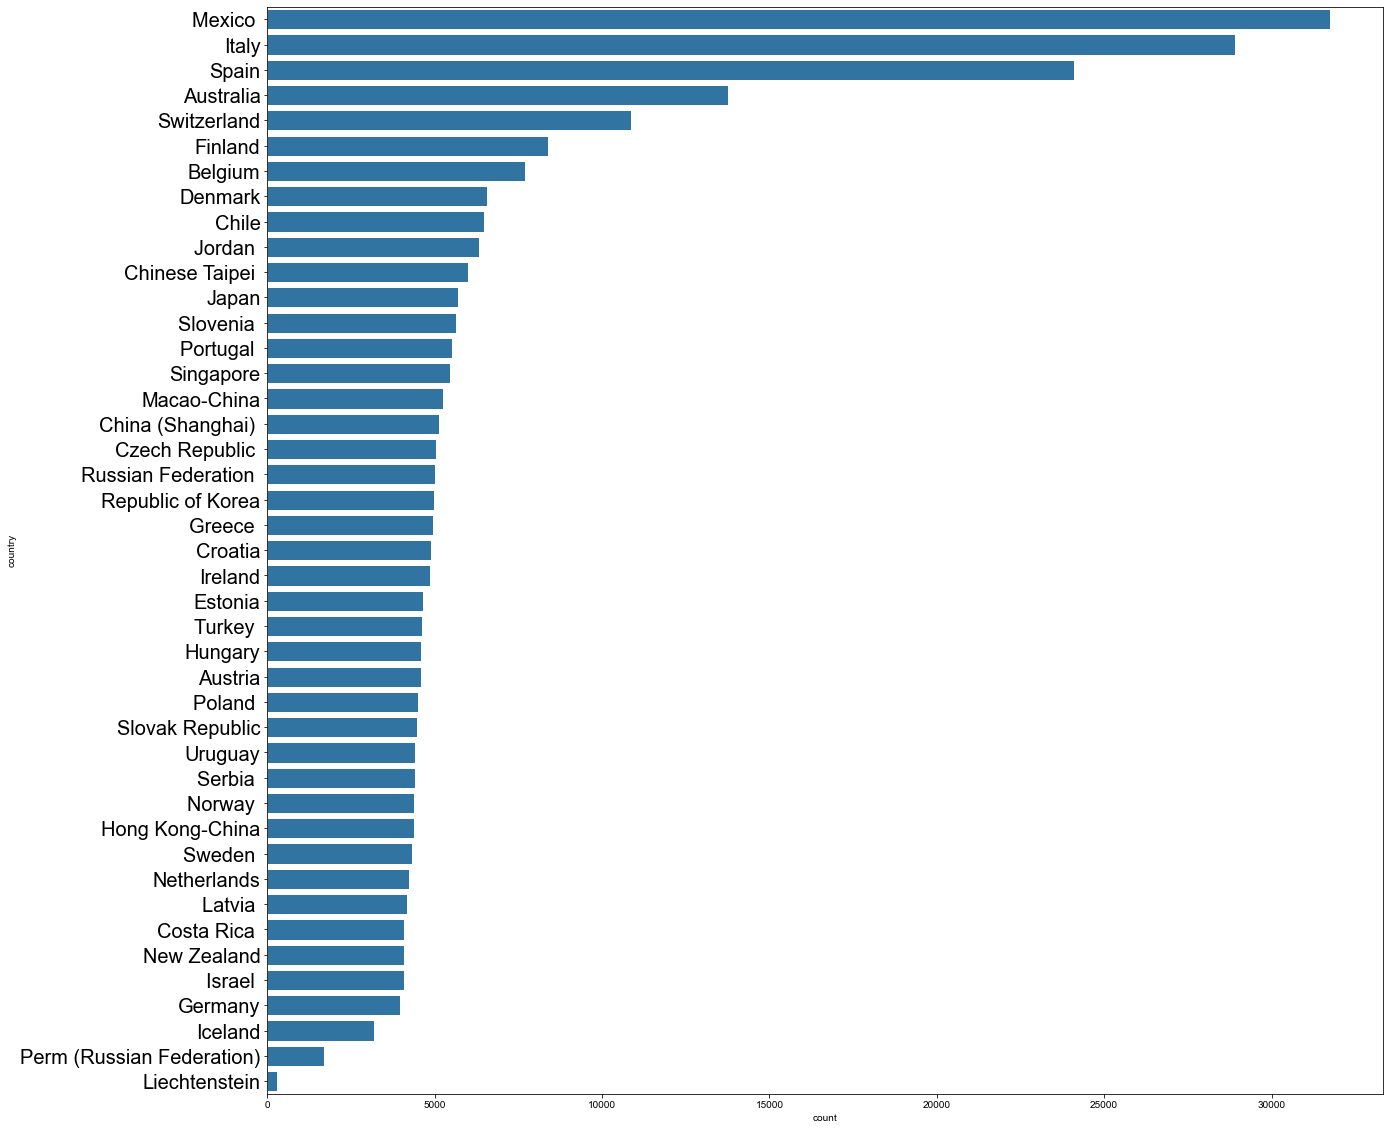

In [37]:
#bar chart of occurence of country and relative frequency
base_color = sb.color_palette()[0]
type_counts = df_dig['country'].value_counts()
type_order = type_counts.index
#sb.set(rc={'figure.figsize':(100,100)})
plt.figure(figsize = [20, 20])
plt.yticks(fontsize= 20)
sb.set(font_scale=3)
sb.countplot(data=df_dig, y='country', color=base_color, order=type_order);


##### Observations
The 3 first countries that occure the most are: Mexico, Italie and Spain.

#### Scores (quantitative)

##### Question
What's the distribution of the performance score?

##### Vizualisation

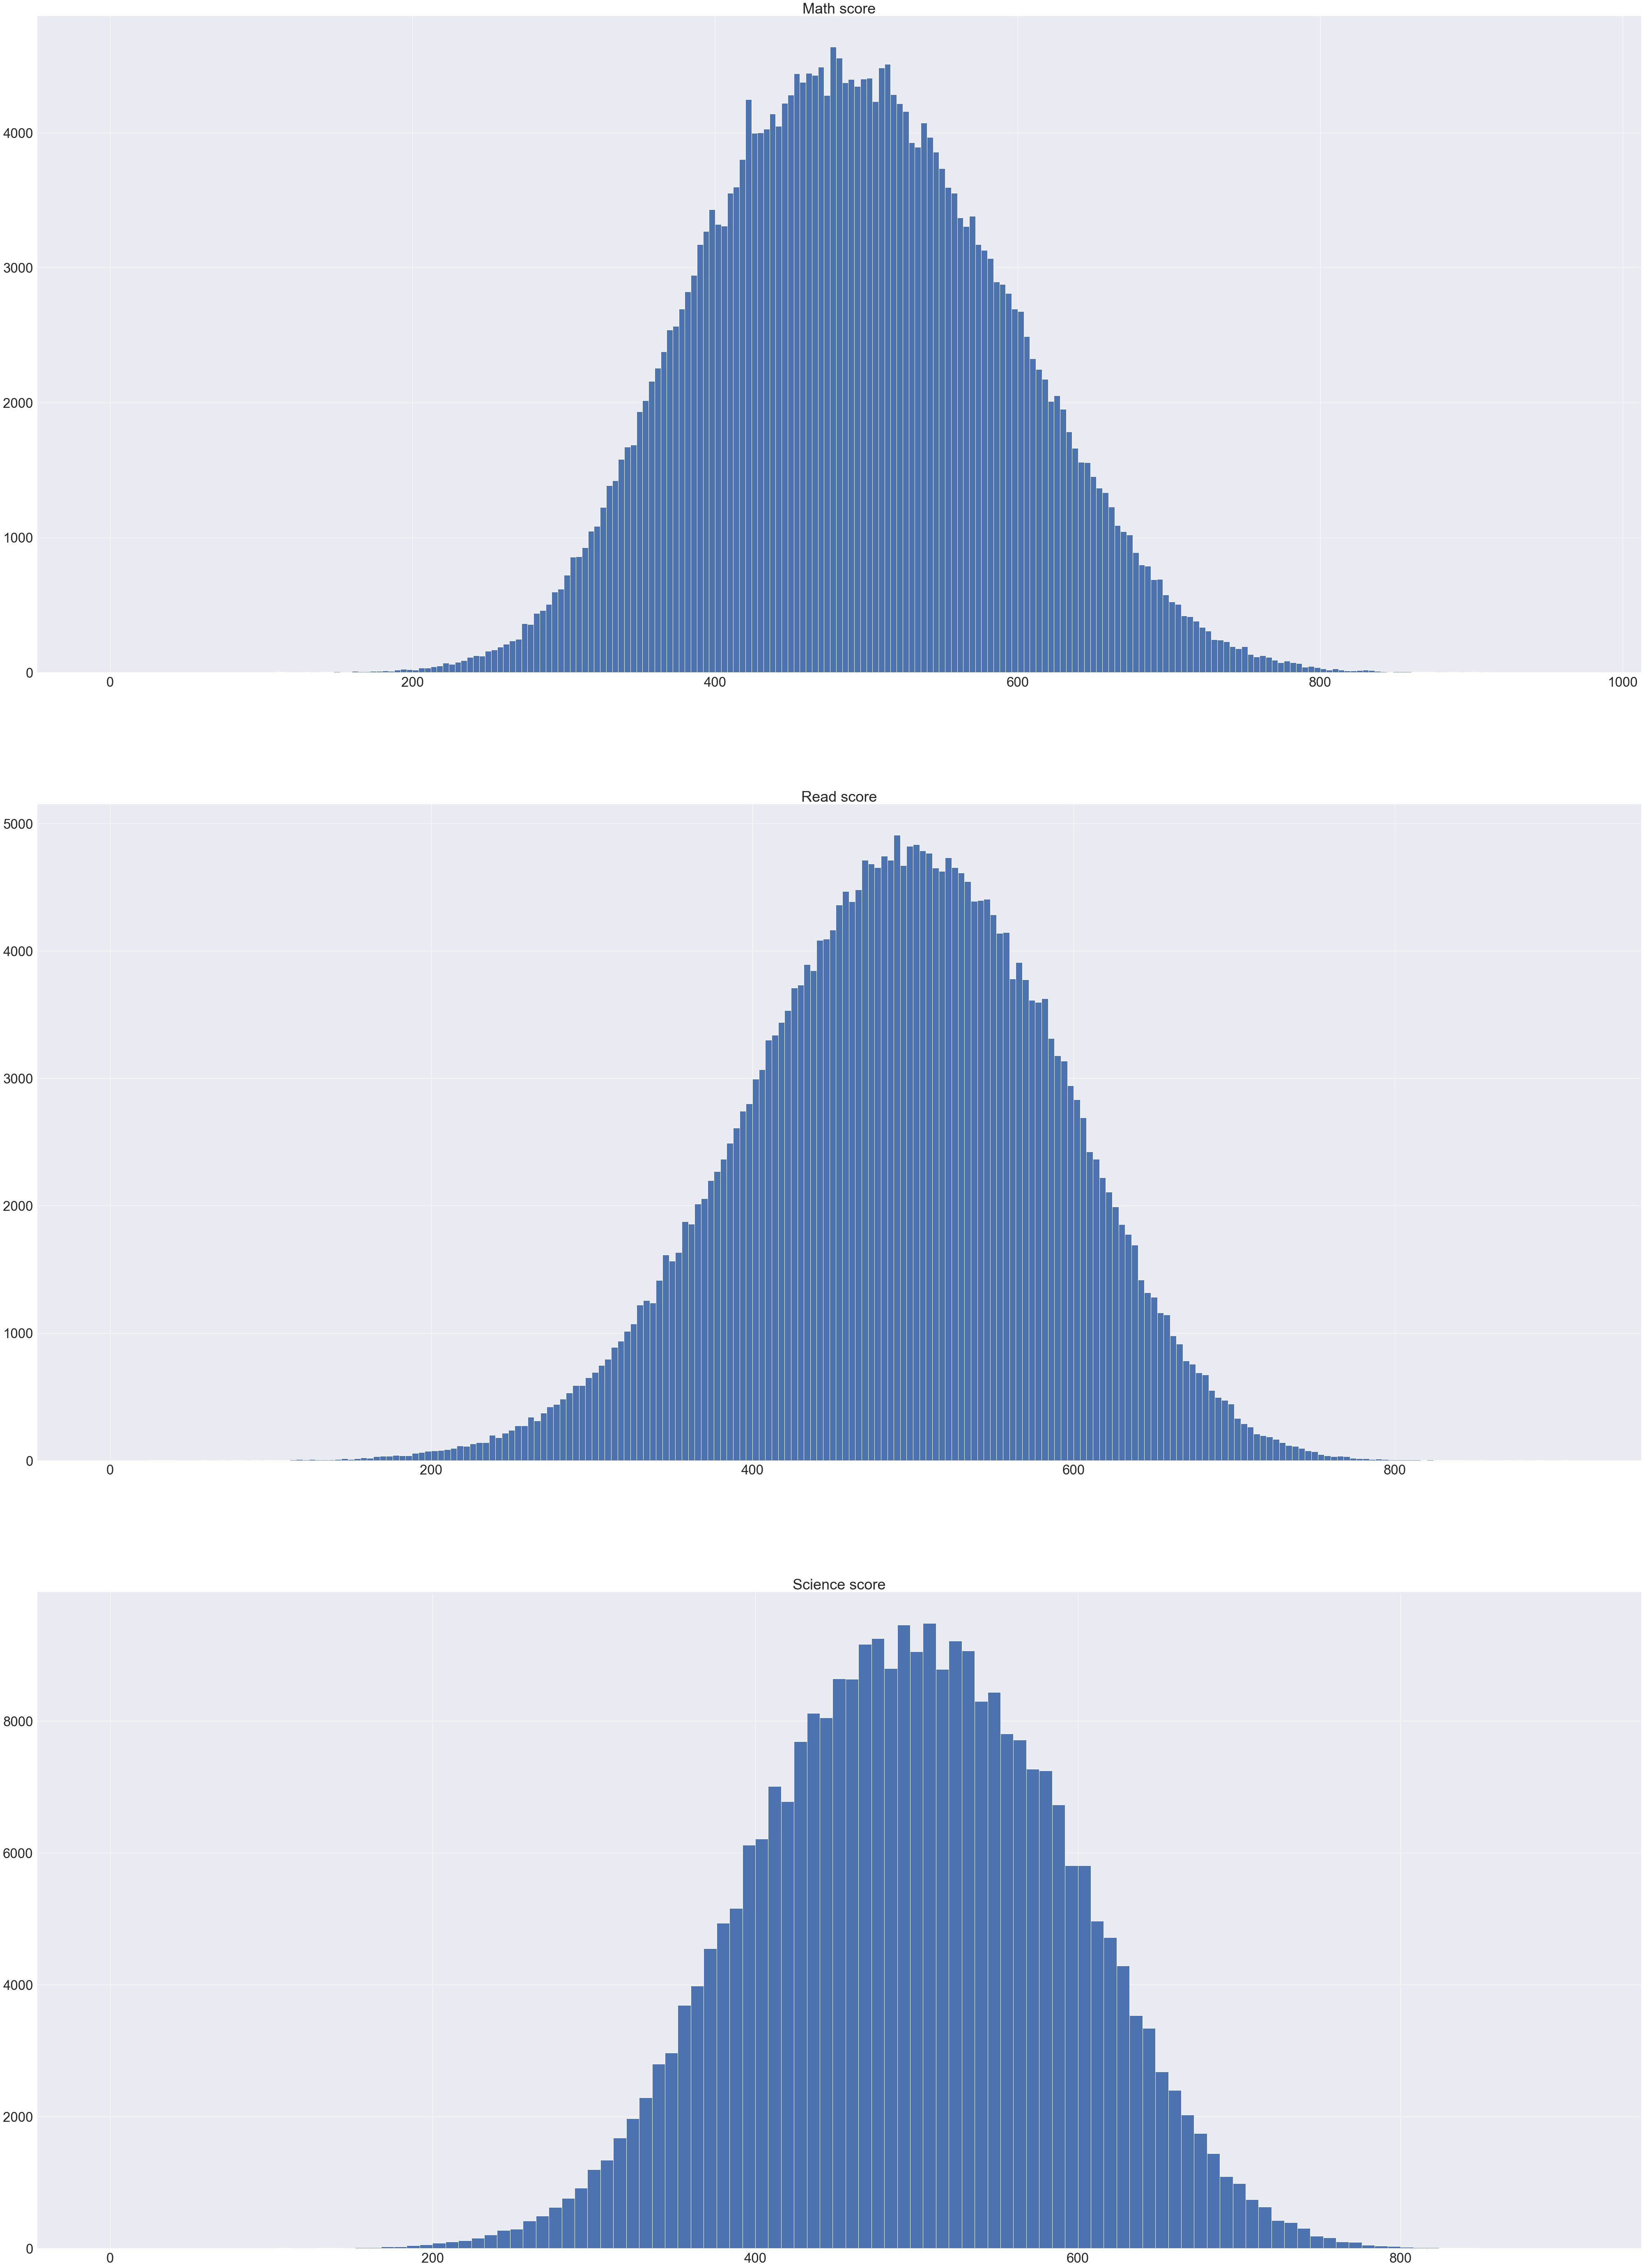

In [38]:
plt.figure(figsize = [70, 100]) 

plt.subplot(3, 1, 1) 
bins = np.arange(0, df_dig['math'].max()+4, 4)
plt.hist(data = df_dig, x = 'math', bins = bins)
plt.title("Math score");

plt.subplot(3, 1, 2)
bins = np.arange(0,  df_dig['read'].max()+4, 4)
plt.hist(data = df_dig, x = 'read', bins = bins)
plt.title("Read score");

plt.subplot(3, 1, 3) 
bins = np.arange(0,  df_dig['science'].max()+8, 8)
plt.hist(data = df_dig, x = 'science', bins = bins)
plt.title("Science score");

##### Observations
The 3 performance score have a normal distribution.

### Digitalization interest

#### Time of IT use (quantitative)

##### Question
What's the distribution the of the variables Time of IT use

##### Vizualisation

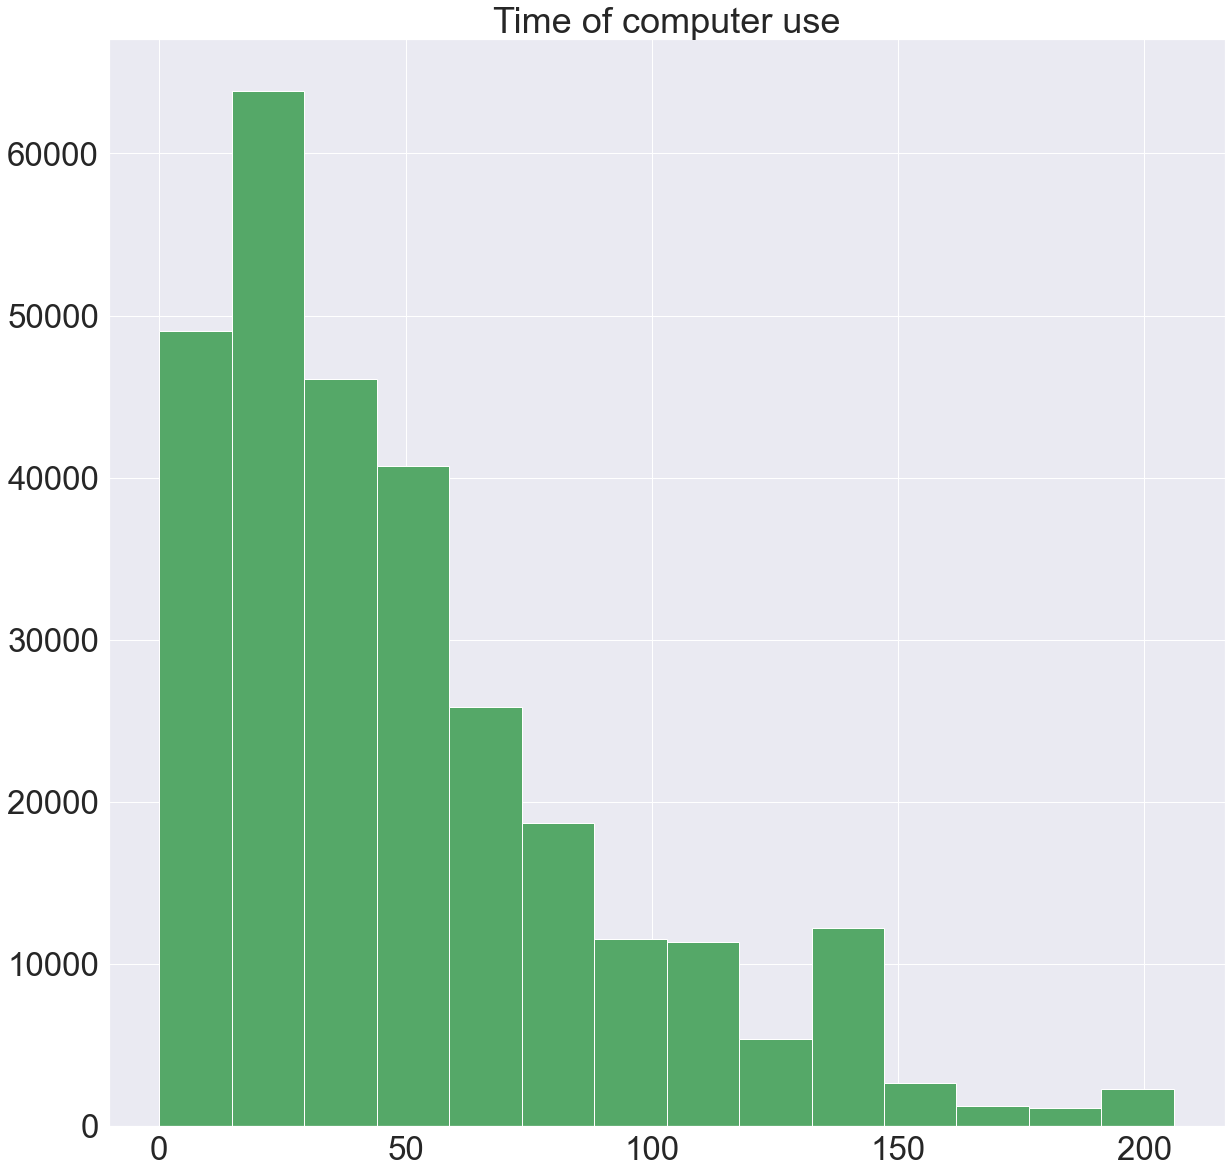

In [39]:
plt.figure(figsize = [20, 20]) 

plt.plot(2, 1, 2) 
#bins = np.arange(0,  df_dig['timeOFUse'].max()+16, 16)
plt.hist(data = df_dig, x = 'timeOFUse', bins = 14)
plt.title("Time of computer use");

##### Observations
It's a right skewed distribution.

#### Having a computer at home (qualitative)

##### Question
What's the relative occurence of having a computer at home?

##### Vizualisation

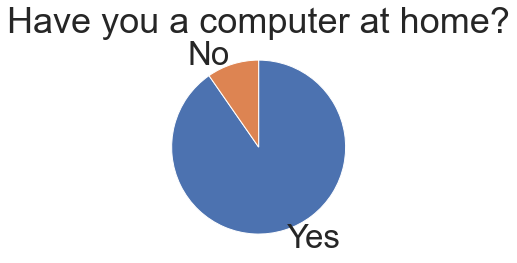

In [40]:
sorted_counts = df_dig['compHome'].value_counts()
label = ("Yes", "No")
plt.title("Have you a computer at home?")
plt.pie(sorted_counts, labels = label, startangle = 90, counterclock = False);

##### Observations
There is far more "Yes" than "No"

### Language interest

#### Bilingual (qualitative)

##### Question
What's the occurence of being bilingual?

##### Vizualisation

Text(0.5, 1.0, 'Are bilingual?')

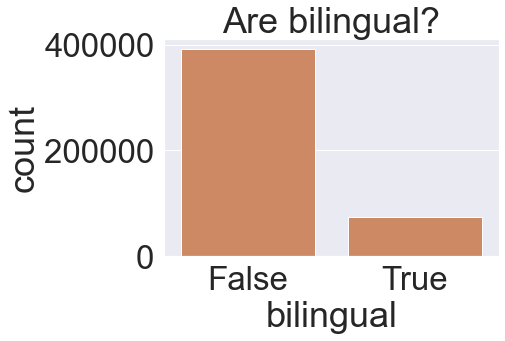

In [41]:
base_color = sb.color_palette()[1]
sb.countplot(data=df_lang, x='bilingual', color=base_color);
plt.title("Are bilingual?")

##### Observations
There is far more "False" than "True"

### parent background interest

#### Parent level and discipline (quantitative)

##### Question
What's the distribution of parent education level and discipline?

##### Vizualisation

In [42]:
df_pBack.parentLevel = df_pBack.parentLevel.astype(int)

C:\Users\guill\anaconda3\envs\uda_da_process\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


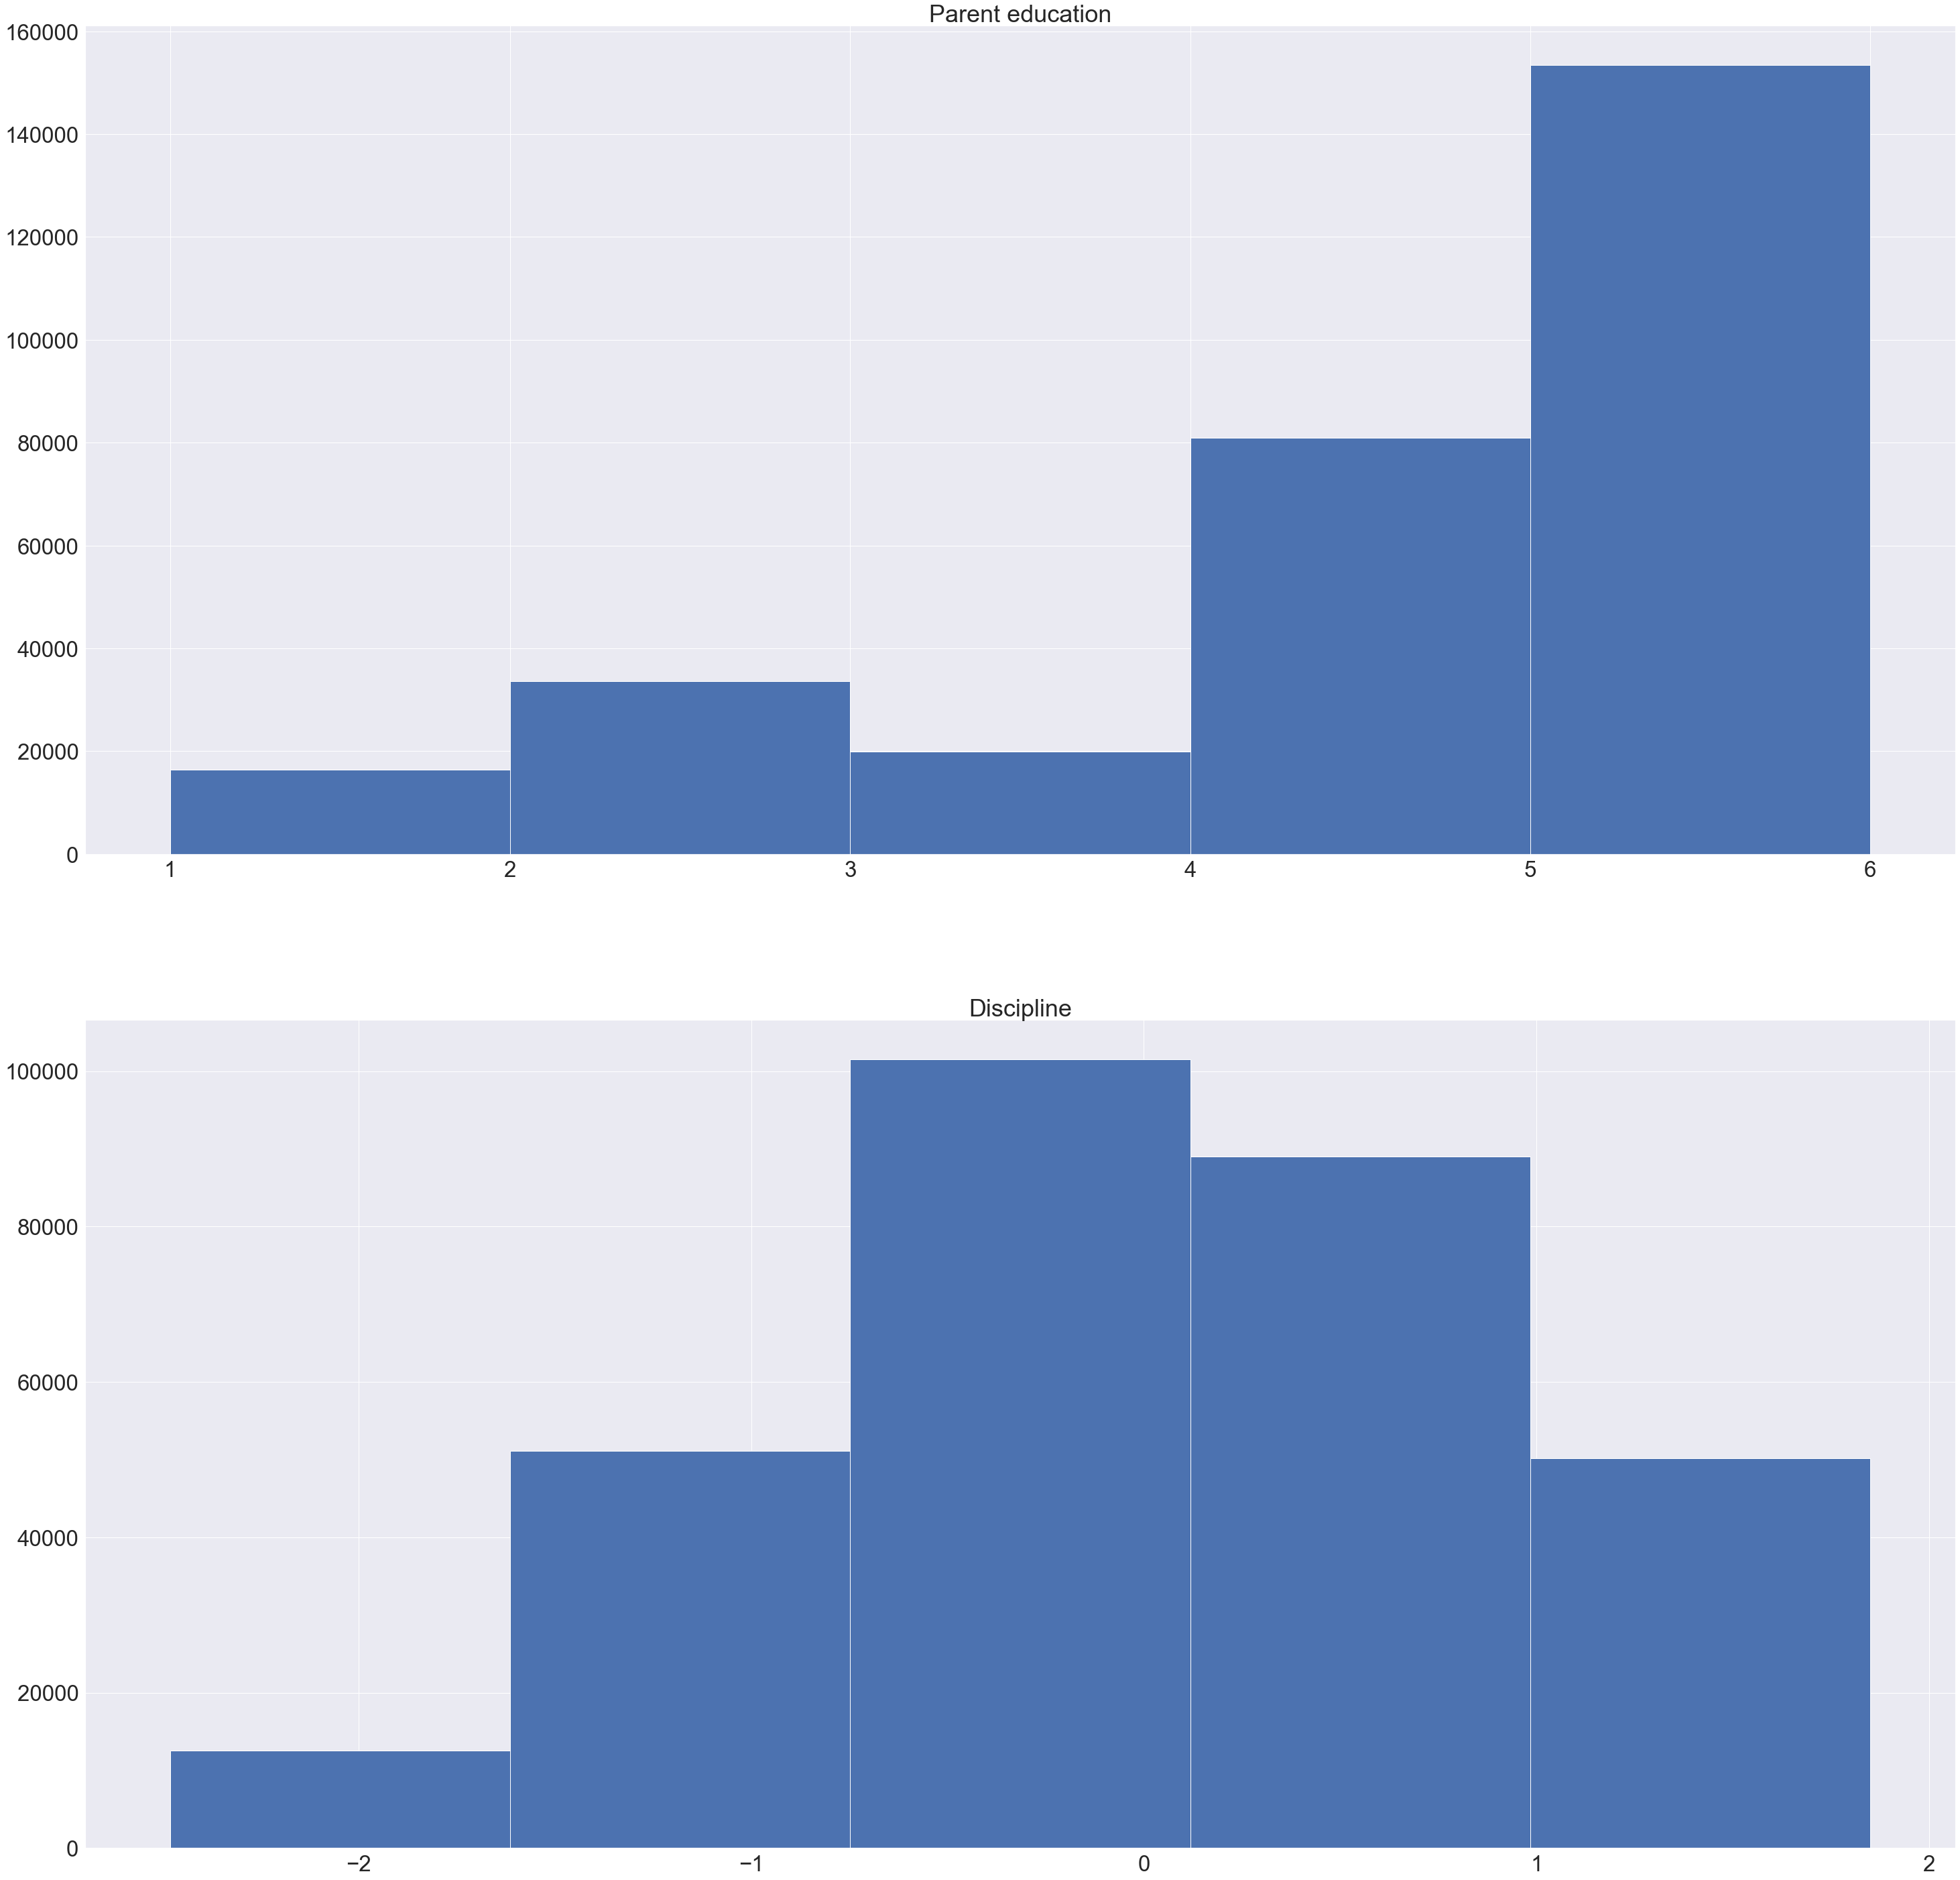

In [43]:
plt.figure(figsize = [50, 50]) 


plt.subplot(2, 1, 1) 
plt.hist(data = df_pBack, x = 'parentLevel', bins = 5)
plt.title("Parent education");

plt.subplot(2, 1, 2) 
plt.hist(data = df_pBack, x = 'discipline', bins = 5)
plt.title("Discipline");

##### Observations
Parent education level has a left-skewed distribution and displicine has normal one

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 0) **Performance**:    
> -The 3 performance scores (math, read and science) have a normal distribution wich isn't a surprise because a lot of human skills follow this distribution.  
> 1) **Digitalization** interest:  
> - timeOFUse has a right-skewed distribution. That means that the majority of people don't use a lot internet (or not at all) and the more they spend time the less they are.    
> 2) **Multilanguage** interest:     
> - No variables have distribution (binary output)    
> 3) **Parent's background** interest:     
> - The variable Discipline seems to have a normal distribution but there is more people after the mean (on the right side of the distribution). The Parent level variable has a left-skewed distribution. I was first surprised because I thought it would follow a normal one but I think because it's OECD countries that are the most developped in the world (and have a strong 3rd sectore) and they majority of people are highly graduated   
I don't need no more transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Except for performance score I needed to adjust the bin parameter to have a satisfying distribution. But execpt for that I didnt perform any operation to have a better distribution

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Digitalizatin interest

##### Question
What's the relation between time of IT use and math score?

##### Vizualisation

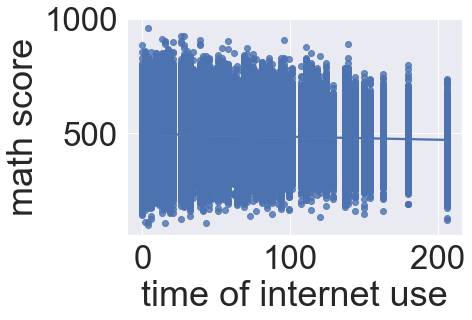

In [44]:
#I'll first show the relationship between the variables 
#math (output) and timeOFUse (input). These are 2
#quantitative variable so the scatter plot is appropriate
sb.regplot(data = df_dig, x = 'timeOFUse', y = 'math');
plt.xlabel('time of internet use')
plt.ylabel('math score');

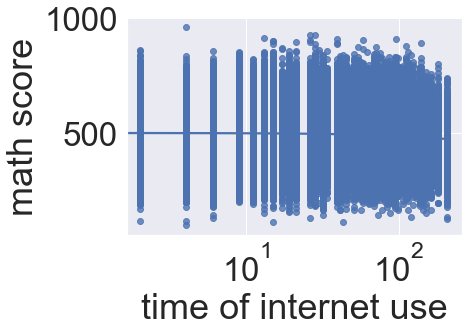

In [45]:
#same but with a log scale on the x-axis
sb.regplot(data = df_dig, x = 'timeOFUse', y = 'math');
plt.xscale('log')
plt.xlabel('time of internet use')
plt.ylabel('math score');

##### Observations
We can see a negative relationship between math score and time of internet use

##### Question
What's the relationship between having a computer at home and read score?

##### Vizualisation

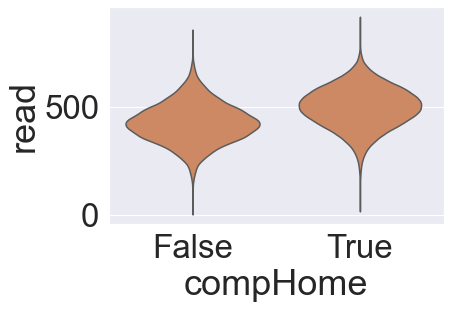

In [46]:
#I'll then show the relationship between the variables 
#read (output) and compHome (input). Read is quantitative
#variabel and compHome is qualitative
#so the violin plot is appropriate
sb.violinplot(data=df_dig, y='read', x='compHome', color=base_color, inner=None);

##### Observations
We can observe that the mean of read of people who don't have a computer at home is higher (and so the distribution)

### Parent background interest

##### Question
What's the relationship between parent education level and science score?

##### Vizualisation

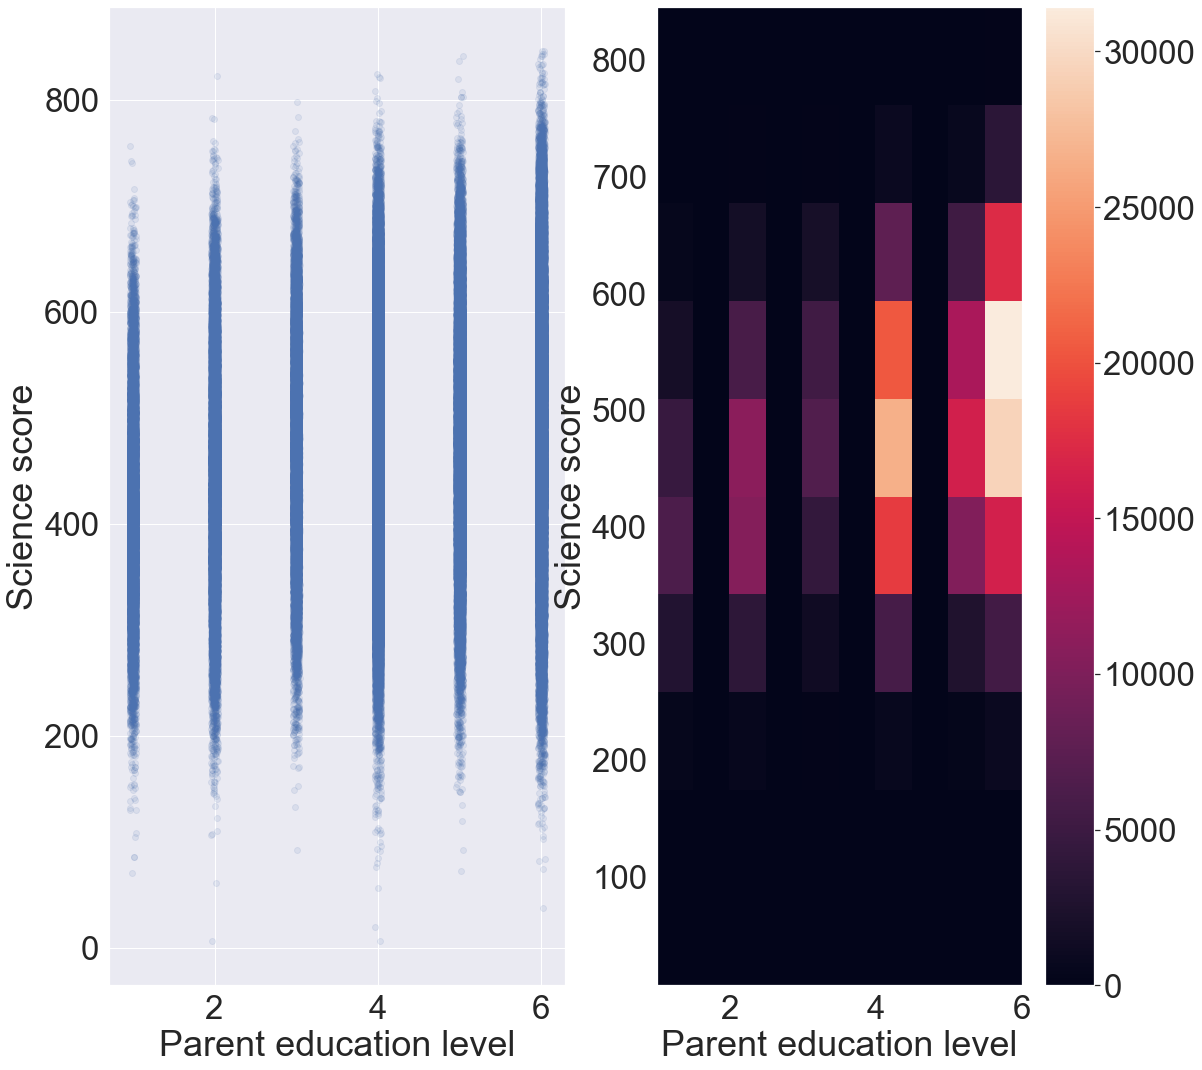

In [47]:
#I'll display the relationship between parent education
#level (quantitative discrete) and science score (quantitative).
#I'll use an heatmap and a scattet plot with jitter effect
plt.figure(figsize = [18, 18])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df_pBack, x = 'parentLevel', y = 'science', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Parent education level')
plt.ylabel('Science score');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df_pBack, x = 'parentLevel', y = 'science')
plt.colorbar()
plt.xlabel('Parent education level')
plt.ylabel('Science score');

##### Observations
We can see a positive relationship between science score and parent education level (especially in 2nd one)

##### Question
What's the relationship between discpline and math score?

##### Vizualisation

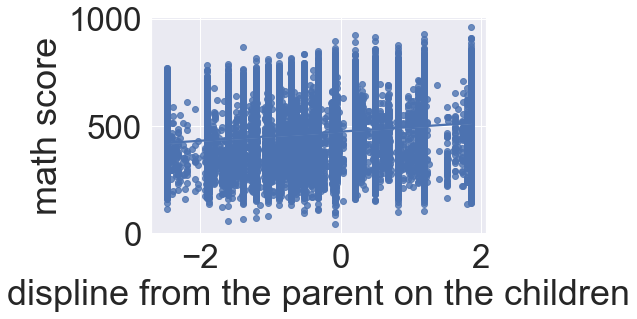

In [48]:
#I'll display the relationship between discipline
#level (quantitative) and math score (quantitative).
#I'll use a scatterplot
sb.regplot(data = df_pBack, x = 'discipline', y = 'math');
plt.xlabel('displine from the parent on the children')
plt.ylabel('math score');

##### Observations
We can see a positive relationship between math score and and discipline

### Bilingual interest

##### Question
What's the relationship between read score and being bilingual?

##### Vizualisation

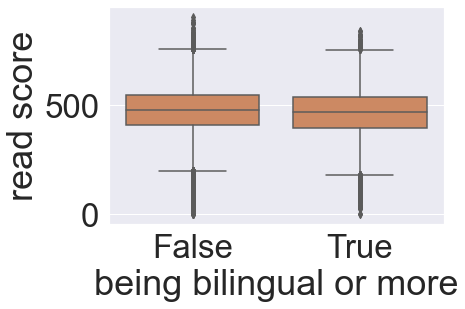

In [49]:
#I'll display the relationship between being bilingual
#(qualitative) and read score (quantitative).
#I'll use a boxplot
sb.boxplot(data=df_lang, y='read', x='bilingual', color=base_color)
plt.xlabel('being bilingual or more')
plt.ylabel('read score');

##### Observations
We can't observe significative difference between being bilingual on read score

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> All asumptions that I had about relationship that I "tested" were correct (for example having more discipline is correlated with hight math score) but I couldn't see any difference bewtween being bilingual or not on read score. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I tried to display the relationship between displine and parent educational level and I discovered a positive relation between the 2 variables.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Digital interest

##### Question
What's the relationship between math score, having a computer at home and time of IT use?

##### Vizualisation

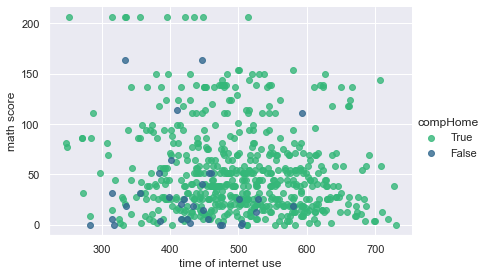

In [55]:
#I'll display the relation between math score (quantitative)
#timeOFUse (quantitative) and comHome (qualitative)
#with the use of a scatter plot with color
#I'll sample because there is too much data
np.random.seed(2018)
sample = np.random.choice(df_dig.shape[0], 1000, replace = False)
df_dig_subset = df_dig.reindex(sample)

g = sb.FacetGrid(data = df_dig_subset, hue = 'compHome',
               height = 4, aspect = 1.5, palette = 'viridis_r')
g.map(sb.regplot,'math','timeOFUse', fit_reg = False);
g.add_legend()
plt.xlabel('time of internet use')
plt.ylabel('math score')
sb.set(rc={'figure.figsize':(800,800)})
plt.show();

##### Observations
We can see a negative relationship between math score and time of internet use

### Bilingual interest

In [51]:
# I won't do any multivariate analysis for this interest 
#because there is only one input variables

### Parent background interest

##### Question
What's the relation between the 3 performance score?

##### Vizualisation

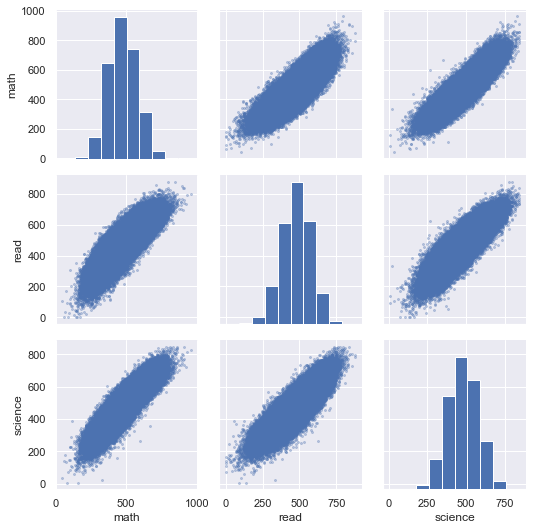

In [52]:
#For the last interest I tried to create a matrix
#with performance variables
stats = ['math', 'read', 'science']
g = sb.PairGrid(data = df_pBack, vars = stats);
g.map_offdiag(plt.scatter, alpha= 0.3, s = 4);
g.map_diag(plt.hist);

##### Observations
We can see a positive relationship between the 3 performance score.

In [53]:
# Correlations Heatmap
#I can't display it because it "kills" my kernel 
#every time I run it ...
####sb.heatmap(df_pBack[stats].corr(), annot = True,
####         fmt = '.2f', vmin = 0);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Regarding the digital interest I don't think the features (timeOFUse and compHome)really strenghten them because there also correlated together (having no computer mean less time of internet). For the parent background interest I found it very interesting to see the relations between the 3 scores. If you are good in one you are likely to be good in the other.

### Were there any interesting or surprising interactions between features?

> I didn't have any other surprise besides the one mentioned above

## Conclusions


> I'll conclude by trying to answer the questions I ask me at the beginning.  
> 1) I'm interested about the effect of digitalization on school performance  
> There is a positive correlation bewteen digitalization and grade  
> 2) I live in Switzerland that is a multilanguages countries and I wonder if knowing more language help you at school  
> I didn't find any relationship between good grades and being bilingual  
> 3) Does your parent background have an impact on your performances ?  
> It seems that the responses is yes. There is a positive correlation between your performance scores and the parent background
> the main goal of this project wasn't really to answer this question but more to show my skill with vizualization. Otherwise I would have used a more mathematical approach to answer these questions.

In [54]:
#Save the dataframe to be reused in the part 2
df_dig.to_csv('df_dig.csv', index=False)
df_lang.to_csv('df_lang.csv', index=False)
df_pBack.to_csv('df_pBack.csv', index=False)